### Latar Belakang
DQLab Telco merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experience nya sehingga tidak akan di tinggalkan pelanggan.

Walaupun baru berumur 1 tahun lebih sedikit, DQLab Telco sudah mempunyai banyak pelanggan yang beralih langganan ke kompetitior. Pihak management ingin mengurangi jumlah pelanggan yang beralih (churn) dengan menggunakan machine learning.

Oleh karena itu, tim Data Scientist dimimta untuk mempersiapkan data sekaligus membuat model prediksi yang tepat untuk menentukan pelanggan akan berhenti berlangganan (churn) atau tidak.


### Tugas dan Langkah
Sebagai seorang data scientist, kamu diminta untuk menyiapkan data sebelum di lakukan permodelan.

Pada tugas kali ini, kamu akan melakukan Data Prepocessing (Data Cleansing) bulan lalu, yakni Juni 2020.

Langkah yang akan dilakukan adalah,

1. Mencari ID pelanggan (Nomor telphone) yang valid
2. Mengatasi data-data yang masih kosong (Missing Values)
3. Mengatasi Nilai-Nilai Pencilan (Outlier) dari setiap Variable
4. Menstandarisasi Nilai dari Variable


### Library yang Digunakan
Pada analisis kali ini, akan digunakan beberapa package yang membantu kita dalam melakukan analisis data,

1. Pandas

    Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.

<ul>
    <li>read_csv() digunakan untuk membaca file csv</li></b>
    <li>str.match() digunakan untuk mencocokan dengan karakter tertentu</li></b>
    <li>drop() digunakan untuk menghapus</li></b>
    <li>count() digunakan untuk mengitung masing-masing variable</li></b>
    <li>drop_duplicates() digunakan untuk menghapus data duplicate rows</li></b>
    <li>fillna() digunakan untuk mengisi dengan nilai tertentu
    <li>quantile() digunakan untuk melihat quantile ke tertentu
    <li>mask() menganti nilai tertentu jika kondisi memenuhi
    <li>astype() merunubah tipe data
    <li>value_counts() digunakan untuk mengitung unik dari kolom
    <li>sort_values() digunakan untuk sort values
    <li>isnull() digunakan untuk mendeteksi missing values
    <li>dropna() digunakan untuk menghapus missing values
    <li>replace() digunakan untuk mengganti nilai
</ul>

2. Matplotlib

    Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.

    <ul><li>figure() digunakan untuk membuat figure gambar baru</li></ul>

3. Seaborn

    Seaborn membangun di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda terlihat sedikit lebih cantik.

    <ul><li>box_plot() digunakan untuk membuat box plot</li>


## Data yang digunakan

Untuk Dataset yang digunakan sudah disediakan dalam format csv, silahkan baca melalui fungsi pandas di python `df_load = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv')`

Untuk detil datanya adalah sebagai berikut:

<ul> 
    <li>UpdatedAt Periode of Data taken
    <li>customerID Customer ID
    <li>gender Whether the customer is a male or a female (Male, Female)
    <li>SeniorCitizen Whether the customer is a senior citizen or not (1, 0)
    <li>Partner Whether the customer has a partner or not (Yes, No)
    <li>Dependents Whether the customer has dependents or not (Yes, No)
    <li>tenure Number of months the customer has stayed with the company
    <li>PhoneService Whether the customer has a phone service or not (Yes, No)
    <li>MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)
    <li>InternetService Customer’s internet service provider (DSL, Fiber optic, No)
    <li>OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)
    <li>OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)
    <li>DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)
    <li>TechSupport Whether the customer has tech support or not (Yes, No, No internet service)
    <li>StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)
    <li>StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)
    <li>Contract The contract term of the customer (Month-to-month, One year, Two year)
    <li>PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
    <li>PaymentMethod The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    <li>MonthlyCharges The amount charged to the customer monthly
    <li>TotalCharges The total amount charged to the customer
    <li>Churn Whether the customer churned or not (Yes or No)
</ul>

##Import Library dan Dataset
Berdasarkan penjelasan mengenai library dan dataset yang akan digunakan, sekarang hal pertama yang akan kita lakukan adalah melakukan import library dan dataset ke dalam workspace kita.

Setelah dataset di-import ke dalam workspace, tampilkan jumlah kolom dan baris dari data set dengan menggunakan .shape dan print 5 baris teratas dengan menggunakan head() dan carilah ada berapa nilai customerID yang bersifat unique dengan menggunakan .unique


In [1]:
import pandas as pd
pd.options.display.max_columns = 50 # digunakan untu mempermudah penampilan row data

df_load = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv')

#tampilkan jumlah baris dan kolom
print("tampilan jumlah baris dan kolom:",df_load.shape)
#tampilkan 5 data teratas
print(df_load.head(5))
#jumlah ID yang unik
print("Jumlah ID yang unik", df_load.customerID.nunique())

tampilan jumlah baris dan kolom: (7113, 22)
   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   



## Memfilter ID Number Pelanggan Format Tertentu
Mencari format ID Number (Phone Number) Pelanggan customerID yang benar, dengan kriteria:
<ul>
    <li>Panjang karakter adalah 11-12.
    <li>Terdiri dari Angka Saja, tidak diperbolehkan ada karakter selain angka
    <li>Diawali dengan angka 45 2 digit pertama.
</ul>   


Gunakan fungsi count() untuk menghitung banyaknya rows Customer ID, anda juga bisa menggunakan str.match() & regex untuk mencocokan dengan kriteria diatas. Jangan lupa gunakan astype() untuk merubah tipe datanya yang semula numeric

**Notes : Buat kolom bantuan baru dengan nama `valid_id`**

Hasil yang diharapkan adalah sebagai berikut.

In [2]:
# astype digunakan untuk merubah tipe data
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')

df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
print('Hasil Jumlah ID Customer yang terfilter adalah', df_load['customerID'].count())

Hasil Jumlah ID Customer yang terfilter adalah 7006


## Memfilter Duplikasi ID Number Pelanggan
Memastikan bahwa tidak ada Id Number pelanggan yang duplikat. Biasanya duplikasi ID number ini tipenya:

<ul>
    <li>Duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya
    <li>Duplikasi dikarenakan inserting beda periode pengambilan data
</ul>

Gunakan hasil dari pengolahan di tahap sebelumnya df_load untuk di olah di tahap ini. Gunakan fungsi drop_duplicates() untuk menghapus duplikasi rows, dan gunakan sort_valus() untuk mengecek pengambilan data terakhir

In [3]:
#Drop duplicate Row

df_load.drop_duplicates()

#Drop duplicate ID sorted by Periode

df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])

print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah', df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


## Kesimpulan
Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Berdasarkan hasil tersbut, terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir. Jumlah row data ketika pertama kali di load ada sebanyak 7113 rows dan 22 coloumns dengan 7017 jumlah ID yang Unique. Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa 6993 rows data

## Mengatasi Missing values dengan penghapusan Rows
Selanjutnya kita akan menghapus Rows dari data-data yang tidak terdeteksi apakah dia churn atau tidak. Di asumsikan data modeller hanya mau menerima data yang benar ada flag churn nya atau tidak.

Gunakan isnull() digunakan untuk mendeteksi missing values dan dropna() untuk menghapus data yang missing values

In [40]:
# mendekteksi mising value
print('Total missing values data dari kolom Churn', df_load['Churn'].isnull().sum())

# dropping all Rows with spesific column(churn)
df_load.dropna(subset=['Churn'], inplace=True)

print('Total Rows dan kolom Data setelah dihapus data Mising Values', df_load.shape)

Total missing value data dari kolom Churn 43
Total Rows dan kolom Data setelah dihapus data Mising Values (6950, 22)


## Mengatasi Missing Values dengan Pengisian Nilai tertentu
Selain dengan mengapus rows dari data, menangani missing values bisa menggunakan nilai tertentu. Diasumsikan data modeller meminta pengisian missing values dengan kriteria berikut:

<ul>
    <li>Tenure pihak data modeller meminta setiap rows yang memiliki  missing values untuk Lama berlangganan di isi dengan 11
    <li>Variable yang bersifat numeric selain Tenure di isi dengan median dari masing-masing variable tersebut
</ul>   
Tentukan :

<ul>
    <li>Apakah masih ada data yang missing values
    <li>Jumlah Missing Values dari masing-masing variable
</ul>
Tangani Missing Valuesnya

In [14]:

print('Status Missing Values :', df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

#handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

#Loop
#Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace= True)
  #write your command here

print('\nJumlah Missing Values setekah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
Churn               43
customerID           0
TotalCharges         0
MonthlyCharges       0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
DeviceProtection     0
UpdatedAt            0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
tenure               0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
OnlineBackup         0
dtype: int64

Jumlah Missing Values setekah di imputer datanya, adalah:
Churn               43
customerID           0
TotalCharges         0
MonthlyCharges       0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
DeviceProtection     0
UpdatedAt            0
OnlineSecurity       0
InternetService      0
MultipleLines      

## Kesimpulan
Setelah kita analisis lebih lanjut, ternyata masih ada Missing Values dari data yang kita sudah validkan Id Number pelanggannya. Missing values terdapat pada kolom Churn, tenure, MonthlyCharges & TotalCharges. Setelah kita tangani dengan cara penghapusan rows dan pengisian rows dengan nilai tertentu, terbukti sudah tidak ada missing values lagi pada data, terbukti dari jumlah missing values masing-masing variable yang bernilai 0. Selanjutnya kita akan melakukan penanganan pencilan (Outlier)

## Mendeteksi adanya Outlier (Boxplot)
Mendeteksi Pencilan dari suatu Nilai (Outlier) salah satunya bisa melihat plot dari data tersebut menggunakan Box Plot. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan.

 
Gunakan package matplotlib & seaborn untuk memvisualisasika data-data yang mau dilihat box plot nya. Fungsi describe() gunakan saat untuk melihat deskripsi datanya


Persebaran data sebelum ditangani Outlier:
            tenure  MonthlyCharges  TotalCharges
count  6993.000000     6993.000000   6993.000000
mean     32.494351       65.817367   2308.199017
std      25.176534       50.347710   2577.901751
min       0.000000        0.000000     19.000000
25%       9.000000       38.250000    408.500000
50%      29.000000       70.450000   1403.875000
75%      55.000000       89.850000   3801.700000
max     500.000000     2311.000000  80000.000000


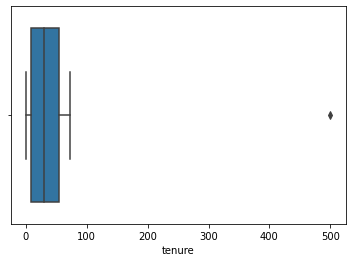

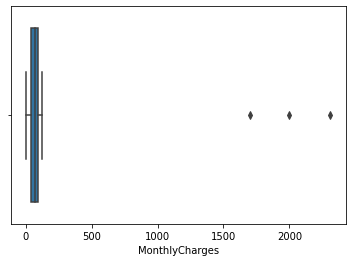

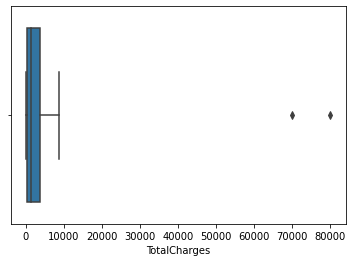

In [20]:
print('\nPersebaran data sebelum ditangani Outlier:')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

#Your Codes here
plt.figure()
sns.boxplot (x=df_load['tenure'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()